In [2]:
# Dragon curve

def dragon(depth):
    def inflate(s):
        return s + [0] + [1-x for x in reversed(s)]
    s = []
    for d in range(depth):
        s = inflate(s)
    return s    


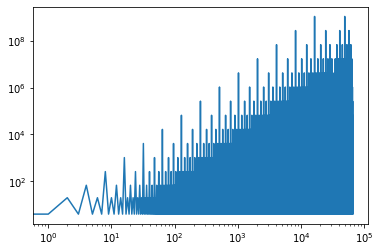

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
x = np.array(dragon(16) + [0], dtype=float)
x = x*2-1
y = np.abs(np.fft.fft(x))**2

plt.loglog(y)
plt.show()



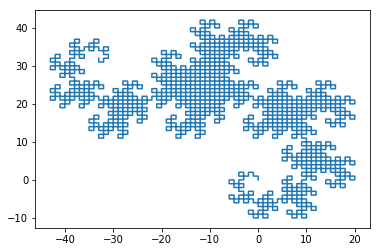

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from math import sin,cos,pi
d=np.array([1.0, 0.0])
da = 90*pi/180 # rotation angle
s, c = sin(da), cos(da)
R = np.array([[c,-s],[s,c]])
Ri = np.linalg.inv(R)
p=np.zeros(2)
path=[p.copy(),]
for bit in dragon(11):
    if bit:
        d = d @ R
    else:
        d = d @ Ri
    p += d
    path.append(p.copy())

path = np.array(path)
plt.plot(path[:,0], path[:,1])

    

In [23]:
"".join(["hc"[x] for x in dragon(6)])

'hhchhcchhhcchcchhhchhccchhcchcchhhchhcchhhcchccchhchhccchhcchcc'

In [24]:
def validate(s):
    d = 1
    acc = 0
    for c in s:
        acc += d
        if c == "h":
            d = -d
    return acc%3 == 0

validate("".join(["hc"[x%2] for x in dragon(6)]))

True